In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Lab_6_matrices_kinematics.ipynb")

# Using matrices to position parts of a robot arm

The goal of this part of the assignment is to use matrices to position a robot arm in space. In the lab we'll just
position each component independently and rotate them by angles.


Slides: https://docs.google.com/presentation/d/1Ut5RnIKU8DF8k_joGXp4tJ1FzBKNIX8JYRE9wkIP_qE/edit?

Moving from the lecture activity to the lab:
- The points for the objects are stored in an object dicitonary - check out object_routines.py
- This dictionary stores the points, the transformation matrix that changes the geometry (eg, mat_transform_square) and some additional stuff (name, color, lengths, angles) that we'll use later
- The plot code has also moved into object_routines.py - there are two plot routines. The first plots the object without any transforms. The second will plot with the object's matrix and an optional matrix that gets multiplied *after* the objet's geometry-changing matrix

Note: There are plots at the end of this jupyter notebook; they should at least run even if you haven't edited the code (they'll just draw the wrong things). Feel free to jump ahead to the plots as you work through the problems.

In [2]:
# The usual imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# These are the routines you'll edit. You can edit them in the.py file OR copy them in from the .py file
#  If you do the latter, you'll probably copy them back to arm_routines.py for the homework
# If you decide to copy the functions in here, make sure to copy ALL of the functions in arm_routines.py to here, then comment out this line and do a restart
from arm_routines import get_rotation_link, get_matrix_finger, get_transform_base, get_transform_link, get_transform_palm, \
    get_transform_finger, create_arm_geometry, set_angles_of_arm_geometry, plot_arm_components


In [4]:
# These commands will force JN to actually re-load the external file when you re-execute the import command
%load_ext autoreload
%autoreload 2

## Step 1: Link transform matrices 

Use matrices to take two basic shapes (a square and a wedge) and re-shape them into the geometry for the arm, gripper.

Yes, you could just create these basic shapes with the "correct" XYs, but we'll use a matrix to transform the
basic shape (square, wedge) to the correct size and shape.

This is actually what most packages (eg, solidworks) do when you make a model. Each part of the model is defined in a "canonical" location, then transformed to the desired position/scale/rotation using a matarix. This is
 *before* calculating the matrix that positions the part based on the, eg, joint angles

For all of these, you should be creating a matrix that consists of a scale followed by a rotate (maybe) followed by a translate

See slides for what the resulting re-positioned shapes look like

Wedge and Square are both -1,-1 to 1, 1 (you can open up the .json files to see what the vertex locations are)

TODO: Edit **get_transform_base, get_transform_link, get_transform_palm, and (optional) get_transform_finger**

These functions do the equivalent of what we did with **mat_transform_square** in the lecture activity.

In [5]:
# Check the returned values
# you are looking for the rot/trans/scale matrices not points!
np.set_printoptions(precision=4, floatmode='fixed')  # Print out with 4 digits of precision


base_points = np.array([])
mat_base = get_transform_base(1, 0.5)
print(mat_base)
mat_base_check = np.array([[0, -0.5, 0], [0.25, 0.0, 0.25], [0.0, 0.0, 1.0]])
assert(np.all(np.isclose(mat_base, mat_base_check)))

[[ 1.5308e-17 -5.0000e-01  0.0000e+00]
 [ 2.5000e-01  3.0616e-17  2.5000e-01]
 [ 0.0000e+00  0.0000e+00  1.0000e+00]]


In [6]:
mat_link1 = get_transform_link(0.5, 0.25)
print(mat_link1)
mat_link1_check = np.array([[0.25, 0.0, 0.25], [0.0, 0.125, 0.0], [0.0, 0.0, 1.0]])
assert(np.all(np.isclose(mat_link1, mat_link1_check)))

[[0.2500 0.0000 0.2500]
 [0.0000 0.1250 0.0000]
 [0.0000 0.0000 1.0000]]


In [7]:
mat_palm = get_transform_palm(0.1)
print(mat_palm)
mat_palm_check = np.array([[0.005, 0.0, 0.0], [0.0, 0.05, 0.0], [0.0, 0.0, 1.0]])
assert(np.all(np.isclose(mat_palm, mat_palm_check)))

[[0.0050 0.0000 0.0000]
 [0.0000 0.0500 0.0000]
 [0.0000 0.0000 1.0000]]


In [8]:
mat_finger_top = get_transform_finger(0.1, (0.075, 0.025), True)
print(mat_finger_top)
mat_finger_top_check = np.array([[0.0375, 0.0, 0.0375], [0.0, 0.0125, 0.05], [0.0, 0.0, 1.0]])
assert(np.all(np.isclose(mat_finger_top, mat_finger_top_check)))

[[0.0375 0.0000 0.0375]
 [0.0000 0.0125 0.0500]
 [0.0000 0.0000 1.0000]]


In [9]:
mat_finger_bot = get_transform_finger(0.1, (0.075, 0.025), False)
mat_finger_bot_check = np.array([[0.0375, 0.0, 0.0375], [0.0, 0.0125, -0.05], [0.0, 0.0, 1.0]])
assert(np.all(np.isclose(mat_finger_bot, mat_finger_bot_check)))
print(mat_finger_bot)

[[ 0.0375  0.0000  0.0375]
 [ 0.0000  0.0125 -0.0500]
 [ 0.0000  0.0000  1.0000]]


In [10]:
grader.check("Matrix_position")

Matrix_position results: All test cases passed!

# Put it all together to make the entire gripper

This should just "work" if you did the previous part correctly (no TODOs). 

In [11]:
# Call it with example angles
base_size_param = (1.0, 0.5)
link_sizes_param = [(0.5, 0.25), (0.3, 0.1), (0.2, 0.05)]
palm_width_param = 0.1
finger_size_param = (0.075, 0.025)

# This function calls each of the set_transform_xxx functions, and puts the results
# in a list (the gripper - the last element - is a list)
arm_geometry = create_arm_geometry(base_size_param, link_sizes_param, palm_width_param, finger_size_param)
if len(arm_geometry) != 5:
    print("Wrong number of components, should be 5, got {len(arm_geometry)}")
if len(arm_geometry[-1]) != 3:
    print("Wrong number of gripper components, should be 3, got {len(arm_geometry[-1])}")

# Look through what's printed out and find the matrices that you created (look for the key 'Matrix' and the name, eg 'Base')
#   Print out all the elements EXCEPT the last one
for elem in arm_geometry[:-1]:
    # Print the base and the links
    print(f"Elem {elem['Name']}, \n  Matrix {elem['Matrix']}")              
          
# The fingers are another list at the end of the list (see the -1?)
for elem in arm_geometry[-1]:
    # Print the base and the links
    print(f" Elem {elem['Name']}, \n  Matrix {elem['Matrix']}")        

Elem Base, 
  Matrix [[ 1.5308e-17 -5.0000e-01  0.0000e+00]
 [ 2.5000e-01  3.0616e-17  2.5000e-01]
 [ 0.0000e+00  0.0000e+00  1.0000e+00]]
Elem Link 0, 
  Matrix [[0.2500 0.0000 0.2500]
 [0.0000 0.1250 0.0000]
 [0.0000 0.0000 1.0000]]
Elem Link 1, 
  Matrix [[0.1500 0.0000 0.1500]
 [0.0000 0.0500 0.0000]
 [0.0000 0.0000 1.0000]]
Elem Link 2, 
  Matrix [[0.1000 0.0000 0.1000]
 [0.0000 0.0250 0.0000]
 [0.0000 0.0000 1.0000]]
 Elem Palm, 
  Matrix [[0.0050 0.0000 0.0000]
 [0.0000 0.0500 0.0000]
 [0.0000 0.0000 1.0000]]
 Elem Finger Top, 
  Matrix [[0.0375 0.0000 0.0375]
 [0.0000 0.0125 0.0500]
 [0.0000 0.0000 1.0000]]
 Elem Finger Bottom, 
  Matrix [[ 0.0375  0.0000  0.0375]
 [ 0.0000  0.0125 -0.0500]
 [ 0.0000  0.0000  1.0000]]


In [12]:
grader.check("Step_1")

Step_1 results: All test cases passed!

## Step 2 - set the matrices that rotate the links/palm

TODO: Edit **get_rotation_link** and (optional) **get_matrix_finger**

This is the equivalent of the **mat_rotate_link** matrices from the lecture activity

In [13]:
# This part should be correct (it's from part 1)
base_size_param = (1.0, 0.5)
link_sizes_param = [(0.5, 0.25), (0.3, 0.1), (0.2, 0.05)]
palm_width_param = 0.1
finger_size_param = (0.075, 0.025)

angles_check = [np.pi/2, -np.pi/4, -3.0 * np.pi/4, [np.pi/3.0, np.pi/4.0, -np.pi/4.0]]

np.set_printoptions(precision=4, floatmode='fixed')

arm_geometry = create_arm_geometry(base_size_param, link_sizes_param, palm_width_param, finger_size_param)
set_angles_of_arm_geometry(arm_geometry, angles_check)

# Notice that there is now an "Angle" key for each dictionary (the "Matrix" key is the same)
# The rotation matrices will NOT be stored in the dictionary, but instead are calculated in get_rotation_link and get_rotation_finger
#   Print out all the elements EXCEPT the last one
for elem in arm_geometry[:-1]:
    # Print the base and the links
    print(f"Elem {elem['Name']}, \n  Matrix {elem['Matrix']}\n  Angle {elem['Angle']}")              
          
# The fingers are another list at the end of the list (see the -1?)
for elem in arm_geometry[-1]:
    # Print the base and the links
    print(f"Elem {elem['Name']}, \n  Matrix {elem['Matrix']}\n  Angle {elem['Angle']}")              


Elem Base, 
  Matrix [[ 1.5308e-17 -5.0000e-01  0.0000e+00]
 [ 2.5000e-01  3.0616e-17  2.5000e-01]
 [ 0.0000e+00  0.0000e+00  1.0000e+00]]
  Angle 0.0
Elem Link 0, 
  Matrix [[0.2500 0.0000 0.2500]
 [0.0000 0.1250 0.0000]
 [0.0000 0.0000 1.0000]]
  Angle 1.5707963267948966
Elem Link 1, 
  Matrix [[0.1500 0.0000 0.1500]
 [0.0000 0.0500 0.0000]
 [0.0000 0.0000 1.0000]]
  Angle -0.7853981633974483
Elem Link 2, 
  Matrix [[0.1000 0.0000 0.1000]
 [0.0000 0.0250 0.0000]
 [0.0000 0.0000 1.0000]]
  Angle -2.356194490192345
Elem Palm, 
  Matrix [[0.0050 0.0000 0.0000]
 [0.0000 0.0500 0.0000]
 [0.0000 0.0000 1.0000]]
  Angle 1.0471975511965976
Elem Finger Top, 
  Matrix [[0.0375 0.0000 0.0375]
 [0.0000 0.0125 0.0500]
 [0.0000 0.0000 1.0000]]
  Angle 0.7853981633974483
Elem Finger Bottom, 
  Matrix [[ 0.0375  0.0000  0.0375]
 [ 0.0000  0.0125 -0.0500]
 [ 0.0000  0.0000  1.0000]]
  Angle -0.7853981633974483


In [14]:
# Check the rotation matrix for the first link
mat_rot_link1 = get_rotation_link(arm_geometry[1])
print(mat_rot_link1)
mat_rot_link1_check = np.array([[0.0, -1.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])
assert(np.all(np.isclose(mat_rot_link1, mat_rot_link1_check)))

[[ 6.1232e-17 -1.0000e+00  0.0000e+00]
 [ 1.0000e+00  6.1232e-17  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  1.0000e+00]]


In [15]:
# Check the rotation matrix for the top finger (optional)
mat_rot_top_finger = get_matrix_finger(arm_geometry[-1][1])
print(mat_rot_top_finger)
mat_rot_top_finger_check = np.array([[0.7071, -0.7071, 0.0354], [0.7071, 0.7071, 0.0146], [0.0, 0.0, 1.0]])
assert(np.all(np.isclose(mat_rot_top_finger, mat_rot_top_finger_check, atol=0.3)))

(0.0, 0.0)
[0.0375 0.0125 1.0000]
(0.0, 0.0)
[[ 0.7071 -0.7071  0.0256]
 [ 0.7071  0.7071  0.0106]
 [ 0.0000  0.0000  1.0000]]


In [16]:
# Check the rotation matrix for the bottom finger (optional)
mat_rot_bot_finger = get_matrix_finger(arm_geometry[-1][2])
print(mat_rot_bot_finger)
mat_rot_bot_finger_check = np.array([[0.7071, 0.7071, 0.0354], [-0.7071, 0.7071, -0.0146], [0.0, 0.0, 1.0]])
assert(np.all(np.isclose(mat_rot_bot_finger, mat_rot_bot_finger_check, atol=0.3)))

(0.0, 0.0)
[0.0375 0.0125 1.0000]
(0.0, 0.0)
[[ 0.7071  0.7071  0.0256]
 [-0.7071  0.7071 -0.0106]
 [ 0.0000  0.0000  1.0000]]


In [17]:
grader.check("set_matrix_from_angles")

set_matrix_from_angles results: All test cases passed!

<!-- BEGIN QUESTION -->

# Plot the arm (step 1)

Note: This should work for step 1 with **b_with_angles** set to False. You'll need to fix the TODOS in plot_arm_components to get it to draw properly with angles for step 2, in addition to doing the two functions in the previous problem

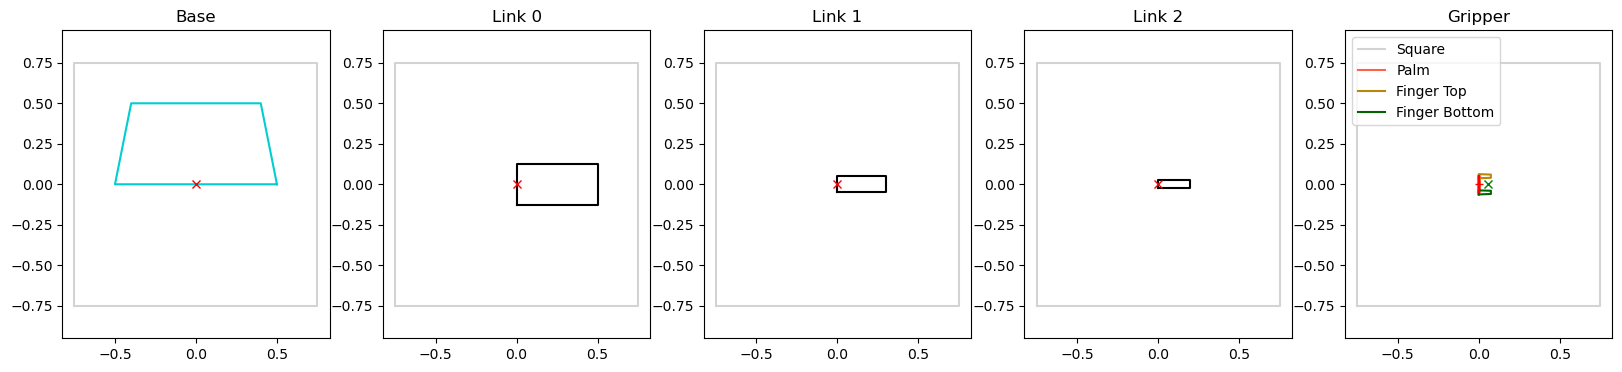

In [18]:
# Re-defining here, just to be safe
base_size_param = (1.0, 0.5)
link_sizes_param = [(0.5, 0.25), (0.3, 0.1), (0.2, 0.05)]
palm_width_param = 0.1
finger_size_param = (0.075, 0.025)

# This function calls each of the set_transform_xxx functions, and puts the results
# in a list (the gripper - the last element - is a list)
arm_geometry = create_arm_geometry(base_size_param, link_sizes_param, palm_width_param, finger_size_param)

# Should show all 5 components, the base, 3 links, and the gripper
# Step 1 - note, comment out this one if you don't want both drawn on top of each other when you do step 2
fig, axs = plt.subplots(1, len(arm_geometry), figsize=(4 * len(arm_geometry), 4))

# TODO Edit plot_arm_components to do matrix transforms
plot_arm_components(axs,arm_geometry )

In [19]:
# Manual grade
print("This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.")

This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Plotting for step 2

I've included several different sets of angle values for you.

TODO: Fix plot_arm_components to handle the angles

In [20]:
# Repeating here
base_size_param = (1.0, 0.5)
link_sizes_param = [(0.5, 0.25), (0.3, 0.1), (0.2, 0.05)]
palm_width_param = 0.1
finger_size_param = (0.075, 0.025)

# This function calls each of the set_transform_xxx functions, and puts the results
# in a list (the gripper - the last element - is a list)
arm_geometry = create_arm_geometry(base_size_param, link_sizes_param, palm_width_param, finger_size_param)


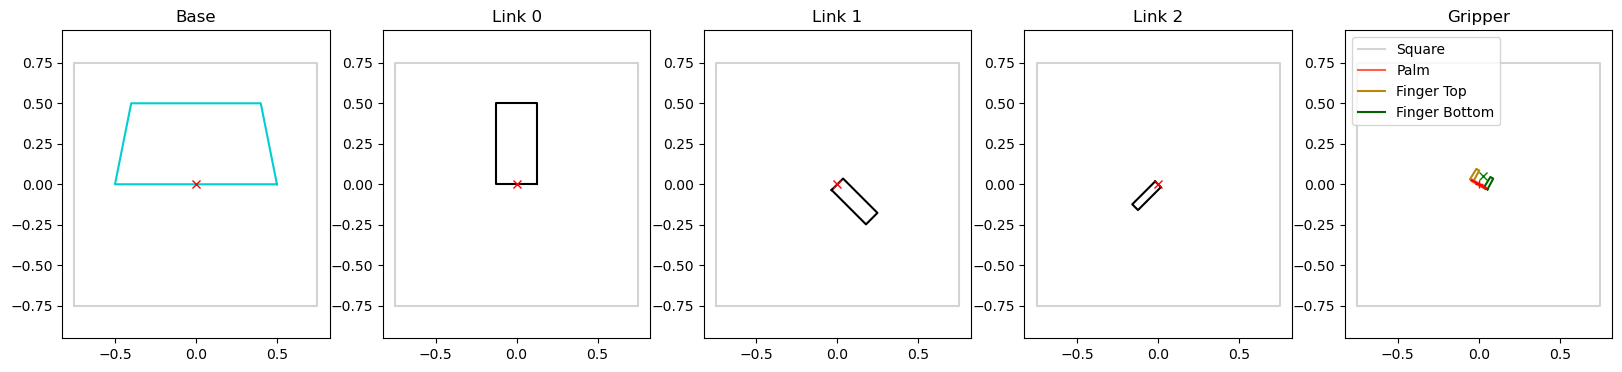

In [21]:
# Step 2 - rotate each link element in its own cooridinate system
# Several different angles to check your results with
angles_none = [0.0, 0.0, 0.0, [0.0, 0.0, 0.0]]
angles_check_fingers = [np.pi/2, -np.pi/4, -3.0 * np.pi/4, [0.0, np.pi/4.0, -np.pi/4.0]]
angles_check_wrist = [np.pi/2, -np.pi/4, -3.0 * np.pi/4, [np.pi/3.0, 0.0, 0.0]]
angles_check = [np.pi/2, -np.pi/4, -3.0 * np.pi/4, [np.pi/3.0, np.pi/4.0, -np.pi/4.0]]

# You can use the above set of angles to check each part of the plot
set_angles_of_arm_geometry(arm_geometry, angles_check)
fig2, axs2 = plt.subplots(1, len(arm_geometry), figsize=(4 * len(arm_geometry), 4))
plot_arm_components(axs2, arm_geometry, b_with_angles=True)

In [22]:
# Manual grade
print("This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.")

This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.


<!-- END QUESTION -->

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [23]:

# List of names (creates a set)
worked_with_names = {"none"}
# List of URLS TCW3 (creates a set)
websites = {"<https://www.geeksforgeeks.org/matrix-manipulation-python/>"}
# Approximate number of hours, including lab/in-class time
hours = 7

In [24]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit through gradescope, Lab 6 Matrices. Don't forget to include arm_routines.py (we will supply data files and matrix/object_routines.py

In [25]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...




RuntimeError: c:\Users\yeasshhhh\anaconda3\Lib\site-packages\zmq\_future.py:679: RuntimeWarning: Proactor event loop does not implement add_reader family of methods required for zmq. Registering an additional selector thread for add_reader support via tornado. Use `asyncio.set_event_loop_policy(WindowsSelectorEventLoopPolicy())` to avoid this warning.
  self._get_loop()
